### Model evaluation for logistic regression
Model metrics with sklearn for logistic regression on the Titanic dataset

***
#### Environment
`conda activate sklearn-env`


***
#### Goals
- Build a pipeline
- Use the pipeline to transform data
- Use the pipeline to predict
- Compute various metrics specific to classification models 

***
#### References

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/modules/model_evaluation.html



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Dataset load from CSV located on UCI website.

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data  
If the URL does not work the dataset can be loaded from the data folder `./data/auto-mpg.data`.

In [2]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/40945
raw_dataset = fetch_openml("titanic", version=1, as_frame=True).frame
dataset = raw_dataset.copy()
dataset.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


In [3]:
dataset.drop(['boat', 'body', 'home.dest', 'fare', 'cabin'],  axis=1, inplace=True)

### Dataset split
- row base in test and train datasets
- column base in features and labels

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=random.randint(0, 1000))
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('survived')
test_labels = test_features.pop('survived')

test_labels.reset_index(drop=True, inplace=True)

#### Build the pipeline

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline

numeric_features = ['age', 'sibsp', 'parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

custom_features = ['pclass']
custom_transformer = FunctionTransformer(np.square, validate=True)

categorical_features = ['embarked', 'sex']
ohe_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', ohe_transformer)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ohe', categorical_transformer, categorical_features),
        ('cust', custom_transformer, custom_features)])

data_prep_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

#### Use the pipeline to transform data

In [6]:
data_prep_data = data_prep_pipeline.fit_transform(train_features, train_labels)

transformed_df = pd.DataFrame(data = data_prep_data)
transformed_df.head(10)

,0,1,2,3,4,5,6,7,8
0,0.524008,0.125,0.000000,0.0,0.0,1.0,0.0,1.0,4.0
1,0.373695,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,4.0
2,0.048016,0.125,0.111111,0.0,0.0,1.0,1.0,0.0,9.0
3,0.235908,0.000,0.222222,0.0,0.0,1.0,1.0,0.0,1.0
4,0.461378,0.125,0.111111,1.0,0.0,0.0,0.0,1.0,1.0
5,0.173277,0.125,0.000000,1.0,0.0,0.0,1.0,0.0,4.0
6,0.348643,0.000,0.000000,1.0,0.0,0.0,0.0,1.0,9.0
7,0.511482,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,1.0
8,0.160751,0.250,0.222222,1.0,0.0,0.0,0.0,1.0,1.0
9,0.686847,0.250,0.000000,0.0,0.0,1.0,1.0,0.0,1.0


#### Build the full pipeline

In [7]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LogisticRegression())])
pipeline_model = pipeline.fit(train_features, train_labels)
print(pipeline_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked'

In [8]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex']),
                                                 ('cust',
                                                  FunctionTransformer(func=<ufunc 'square'>,
                                                                      validate=True),
                                                  ['pclass'])])),
                ('regressor', LogisticRegression())])

#### Use pipeline to predict values

In [9]:
scored_data = pipeline.predict(test_features)

#### Show predicted values

In [10]:
scored_df = pd.DataFrame(data = scored_data)

scored_df = pd.concat([scored_df, test_labels], axis=1)
scored_df.head(10)

,0,survived
0,0,0
1,1,1
2,0,0
3,1,0
4,1,1
5,1,1
6,1,0
7,1,1
8,0,0
9,1,1


### Model evaluation

#### Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [11]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_labels, scored_data).ravel()

#### Plot Confusion Matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [12]:
from sklearn.metrics import plot_confusion_matrix

def plotConfusionMatrix(test_features, test_labels, pipeline):
    title = "Confusion matrix"
    
    disp = plot_confusion_matrix(pipeline, test_features, test_labels,
                                 display_labels=['Survived', 'Not survived'],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
    plt.show()

Confusion matrix
[[137  33]
 [ 27  65]]


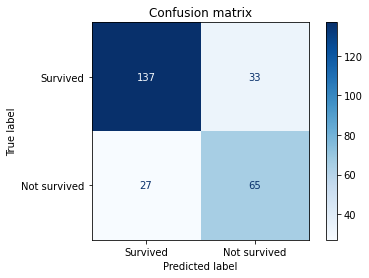

In [13]:
plotConfusionMatrix(test_features, test_labels, pipeline)

#### Metrics 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [14]:
def showMetrics(test_features, test_labels, scored_data, pipeline):
    from sklearn.metrics import accuracy_score
    print("Accuracy: ", accuracy_score(test_labels, scored_data))
    
    from sklearn.metrics import precision_score
    print( "Precission", precision_score(test_labels, scored_data, average='binary', pos_label='1'))
    
    from sklearn.metrics import recall_score
    print( "Sensitivity/Recall: ", recall_score(test_labels, scored_data, average='binary', pos_label='1'))

    print("Specify", tn / (tn+fp))
    
    from sklearn.metrics import f1_score
    print( "F1 score", f1_score(test_labels, scored_data, average='binary', pos_label='1'))
    
    from sklearn.metrics import roc_auc_score
    print( "AuROC", roc_auc_score(test_labels, pipeline.predict_proba(test_features)[:, 1]))

    from sklearn.metrics import log_loss
    print( "Cross-entropy loss", log_loss(test_labels, pipeline.predict_proba(test_features)[:, 1]))

    log_loss
    

In [15]:
showMetrics(test_features, test_labels, scored_data, pipeline)

Accuracy:  0.7709923664122137
Precission 0.6632653061224489
Sensitivity/Recall:  0.7065217391304348
Specify 0.8058823529411765
F1 score 0.6842105263157895
AuROC 0.8079283887468031
Cross-entropy loss 0.4822372152825382


#### Roc Curve - plot

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

In [16]:
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import metrics

def plotAuROC(test_features, test_labels, pipeline, ax = None):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, pipeline.predict_proba(test_features)[:, 1], pos_label='1')
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression estimator')
    display.plot(ax)  

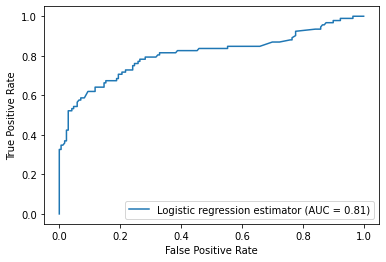

In [17]:
plotAuROC(test_features, test_labels, pipeline)
plt.show()   

### Build basic model without feature engineering and compare metrics

In [18]:
train_dataset_new = train_dataset[['pclass','sibsp','parch', 'survived' ]].copy()
test_dataset_new = test_dataset[['pclass','sibsp','parch', 'survived' ]].copy()

train_features_new = train_dataset_new.copy()
test_features_new = test_dataset_new.copy()

train_labels_new = train_features_new.pop('survived')
test_labels_new = test_features_new.pop('survived')

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_regressor_new = LogisticRegression().fit(train_features_new, train_labels_new)
scored_data_new = logistic_regressor_new.predict(test_features_new)

In [20]:
tn, fp, fn, tp = confusion_matrix(test_labels_new, scored_data_new).ravel()

Confusion matrix
[[142  28]
 [ 52  40]]


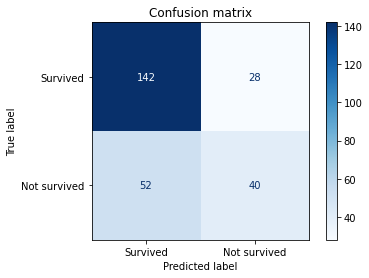

In [21]:
plotConfusionMatrix(test_features_new, test_labels_new, logistic_regressor_new)

In [22]:
showMetrics(test_features_new, test_labels_new, scored_data_new, logistic_regressor_new)

Accuracy:  0.6946564885496184
Precission 0.5882352941176471
Sensitivity/Recall:  0.43478260869565216
Specify 0.8352941176470589
F1 score 0.5
AuROC 0.6530690537084398
Cross-entropy loss 0.6087381522014366


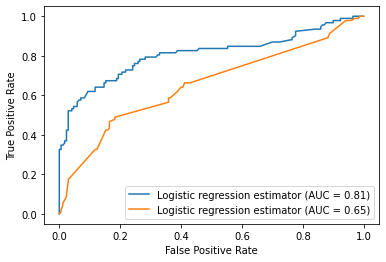

In [23]:
fig, ax = plt.subplots(1,1)
plotAuROC(test_features, test_labels, pipeline, ax)
plotAuROC(test_features_new, test_labels_new, logistic_regressor_new, ax)
plt.show()